<a href="https://colab.research.google.com/github/muhsintsn/Machine-Learning/blob/main/Heart_Stroke_Prediction_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): (gögüs ağrısı ) cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): (tansiyon)resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): (kolesterol) serum cholestoral in mg/dl 
6. #16 (fbs): (şeker glikoz)fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): (eforsuz ekg) resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): ( nabız) maximum heart rate achieved 
9. #38 (exang): (egzersize bağlı gögüs ağrısı) exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): (EKG ST slop'u) the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): (x- ray görüntüleme)number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (damar çap darlığı)(the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (15,8)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import cross_validate
import sklearn
sklearn.metrics.SCORERS.keys()
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve
from scipy.special import expit, logit

# Ingest the data to notebook

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.400,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.300,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.000,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.500,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.600,2,0,2,1


In [ ]:
df.shape

(303, 14)

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


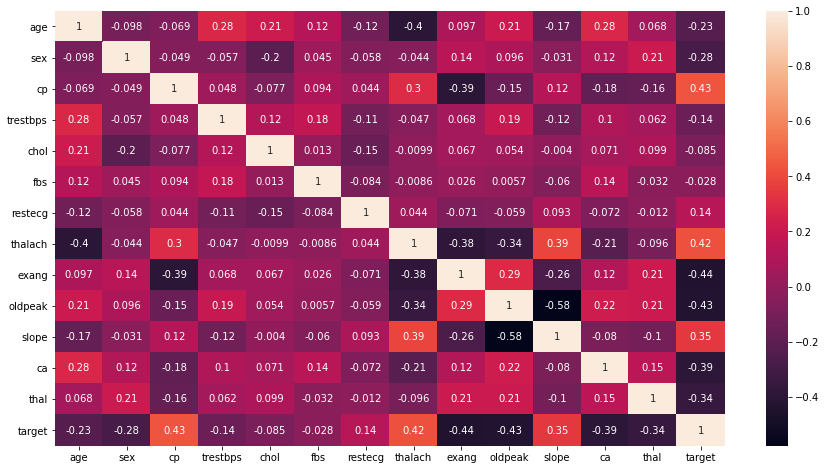

In [ ]:
sns.heatmap(df.corr(), annot=True);


In [ ]:
#multicollinearity control
df_numeric = df.select_dtypes(include ="number")
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

<AxesSubplot:xlabel='target', ylabel='Count'>

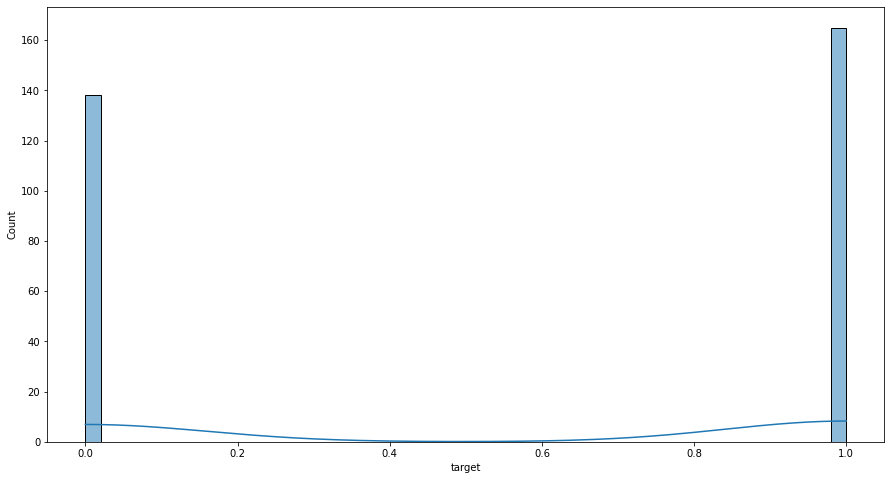

In [ ]:
sns.histplot(df.target, bins = 50, kde= True)

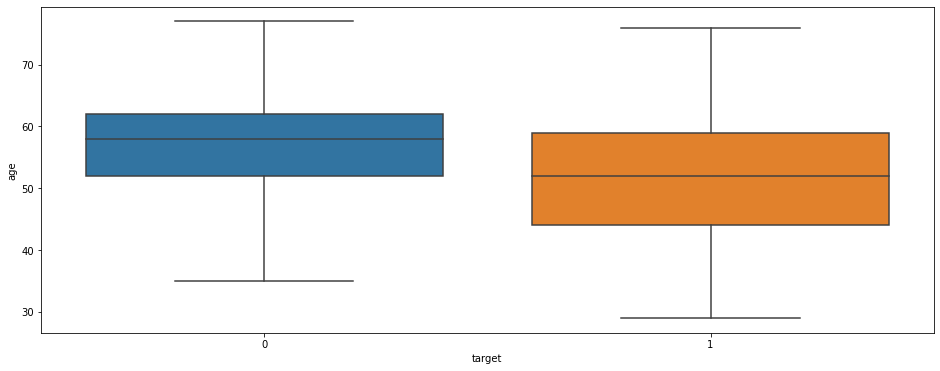

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x="target", y="age", data=df, whis=3)
plt.show()

In [ ]:
corr_by_target = df.corr()["target"].sort_values()[:-1]
corr_by_target

exang      -0.437
oldpeak    -0.431
ca         -0.392
thal       -0.344
sex        -0.281
age        -0.225
trestbps   -0.145
chol       -0.085
fbs        -0.028
restecg     0.137
slope       0.346
thalach     0.422
cp          0.434
Name: target, dtype: float64

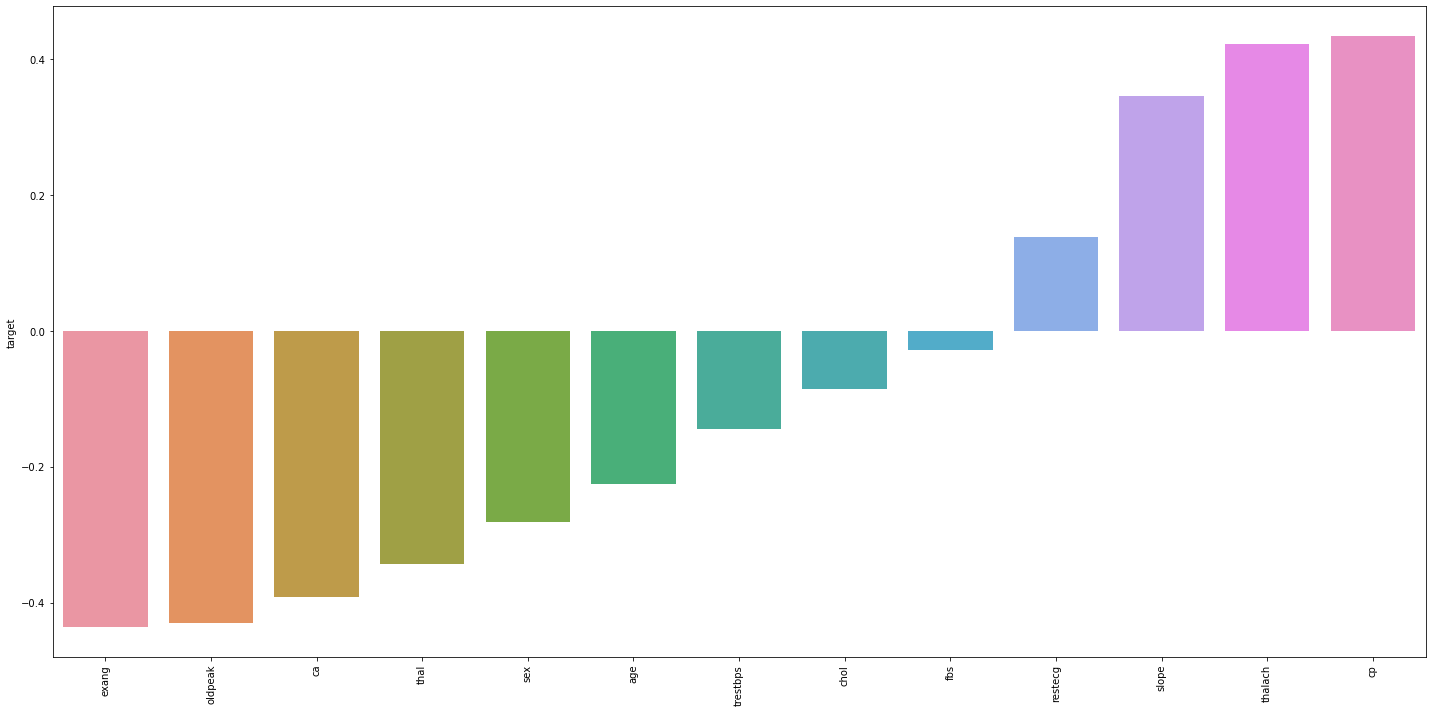

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_target.index, y = corr_by_target)
plt.xticks(rotation=90)
plt.tight_layout();

<AxesSubplot:xlabel='cp', ylabel='target'>

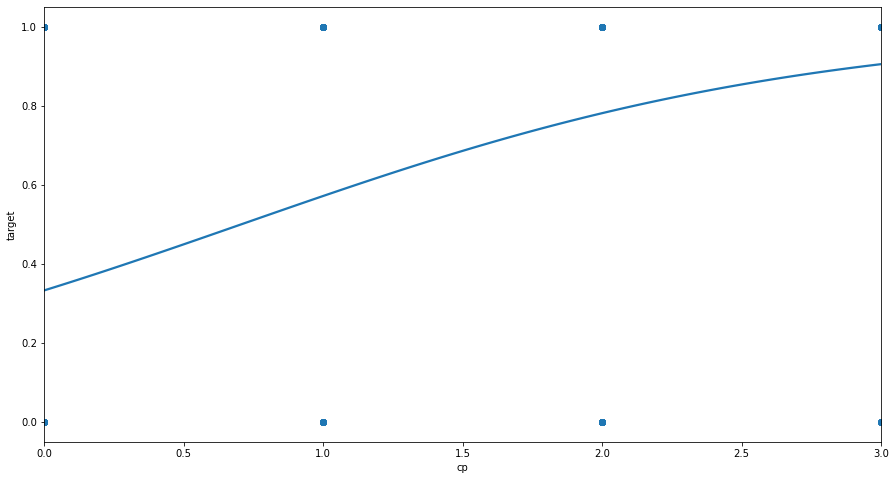

In [ ]:
sns.regplot(x=df['cp'], y = df['target'], data=df, logistic=True, ci=None)

# Data Preprocessing

In [ ]:
X = df.drop(columns='target')
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
log_model.coef_

array([[-0.02633634, -0.68640857,  0.88018967, -0.21905076, -0.12071161,
         0.03140119,  0.38978046,  0.36081274, -0.51916182, -0.66715275,
         0.43778167, -0.83355904, -0.6062495 ]])

In [ ]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [ ]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.90525913, 0.09474087],
       [0.28539834, 0.71460166],
       [0.1634115 , 0.8365885 ],
       [0.98084798, 0.01915202],
       [0.04935942, 0.95064058],
       [0.07875627, 0.92124373],
       [0.43203638, 0.56796362],
       [0.99874255, 0.00125745],
       [0.99484986, 0.00515014],
       [0.53310657, 0.46689343],
       [0.19166046, 0.80833954],
       [0.92437083, 0.07562917],
       [0.07804449, 0.92195551],
       [0.96945316, 0.03054684],
       [0.01073346, 0.98926654],
       [0.05714364, 0.94285636],
       [0.01374385, 0.98625615],
       [0.90963773, 0.09036227],
       [0.99260224, 0.00739776],
       [0.98884697, 0.01115303],
       [0.32396472, 0.67603528],
       [0.98984295, 0.01015705],
       [0.73909441, 0.26090559],
       [0.18888962, 0.81111038],
       [0.0461277 , 0.9538723 ],
       [0.32708359, 0.67291641],
       [0.08408057, 0.91591943],
       [0.4991057 , 0.5008943 ],
       [0.99338059, 0.00661941],
       [0.07293803, 0.92706197],
       [0.

In [ ]:
accuracy_score(y_test,y_pred)

0.881578947368421

In [ ]:
precision_score(y_test, y_pred)

0.8809523809523809

In [ ]:
recall_score(y_test, y_pred)

0.9024390243902439

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [ ]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       103
           1       0.84      0.91      0.88       124

    accuracy                           0.86       227
   macro avg       0.86      0.85      0.86       227
weighted avg       0.86      0.86      0.86       227



In [ ]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.004,0.003,0.739,0.750,0.750,0.750
2,0.005,0.003,0.783,0.818,0.750,0.783
3,0.004,0.003,0.913,0.857,1.000,0.923
4,0.004,0.003,0.870,0.917,0.846,0.880
5,0.005,0.003,0.696,0.688,0.846,0.759
6,0.005,0.003,0.739,0.733,0.846,0.786
7,0.004,0.004,0.826,0.800,0.923,0.857
8,0.004,0.003,0.864,0.846,0.917,0.880
9,0.004,0.003,0.727,0.800,0.667,0.727
10,0.005,0.003,0.864,0.846,0.917,0.880


In [ ]:
df_scores.mean()[2:]

test_accuracy    0.802
test_precision   0.806
test_recall      0.846
test_f1          0.822
dtype: float64

In [ ]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76

Train Set

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       103
           1       0.84      0.91      0.88       124

    accuracy                           0.86       227
   macro avg       0.86      0.85      0.86       227
weighted avg       0.86      0.86      0.86       227



# Implement KNN and Evaluate

# Visually compare models based on your chosen metric

# Chose best model and make a random prediction 